# SCADAA Report

In [1]:
import numpy as np
from numpy.linalg import inv
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import torch

## Exercise 1.1

In [2]:
class LQR:
    def __init__(self, H, M, sigma, alpha, alpha_s, C, D, R, T) -> None:
        self.H = H 
        self.M = M
        self.sigma = sigma
        self.alpha = alpha 
        self.alpha_s = alpha_s
        self.C = C 
        self.D = D 
        self.R = R
        self.T = T

    
    def ricatti_ode(self, t, S):
        return (-2 * (np.transpose(self.H))@S.reshape(2,2) 
                + S.reshape(2,2)@(self.M)@(inv(self.D))@(self.M)@S.reshape(2,2) 
                - self.C).flatten()
    
 
    def solve_lqr(self):
        """
        Solves the LQR problem by integrating the 
        Riccati equation backwards in time.
        """
        # Time points (reversed for backward integration)
        t_points = np.linspace(0, self.T, 1000)[::-1]  

        sol = solve_ivp(
            self.ricatti_ode, [t_points[0], t_points[-1]], 
            self.R.flatten(), t_eval=t_points, vectorized=False
            )

        # Access the solution via .y and potentially reshape if necessary
        S = sol.y
    
        return S, t_points


    # do we need to visualise?
    def visualize_results(self, S, t_points):
        """
        Visualizes the solution of the Riccati equation 
        or the state/control trajectories.
        """
        plt.plot(t_points, S[0, :])
        plt.xlabel('Time')
        plt.ylabel('S[0,0]')
        plt.title('Solution of Riccati Equation over Time')
        plt.show()
        

    def markov_control(self, t, x):
        S, t_points = self.solve_lqr()
        a = torch.tensor(len(t), dtype=torch.float32)
        for t in range(len(t)):
            for x in range(x.shape[1]):
                a[t, x] = -inv(self.D) @ np.transpose(self.M) @ S[:, t].reshape(2, 2) * x[t, x]
        return a

    # this function is incomplete!
    # still trying to figure out the sizes of the tensors
    # i'm confused about batch size :(
    def value_function(self, t, x):
        S, t_points = self.solve_lqr()
        v1 = np.transpose(x) @ S[:, t].reshape(2, 2) @ x
        v2 = np.trace(self.sigma @ np.transpose(self.sigma) @ S)
        return v1 + v2


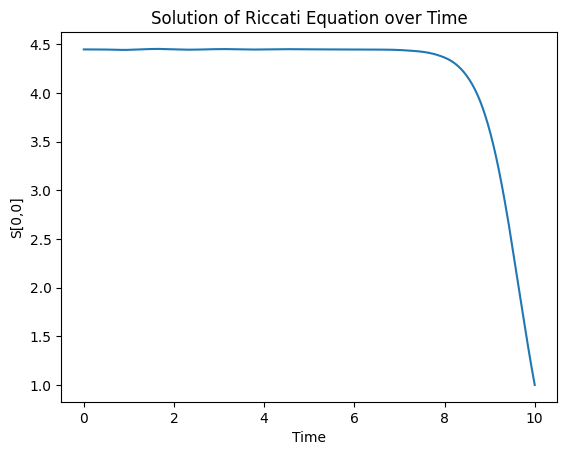

[[1.         1.02514964 1.05054589 ... 4.44851088 4.44853146 4.44855358]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.02514964 1.05054589 ... 4.44851088 4.44853146 4.44855358]]


In [6]:
# Example usage
H = np.array([[1, 0], [0, 1]])
M = np.array([[1, 0], [0, 1]])
sigma = np.array([[0, 0], [0, 0]])
alpha = np.array([[0, 0], [0, 0]])
alpha_s = np.array([[0, 0], [0, 0]])
C = np.array([[1, 0], [0, 1]])
D = np.array([[2, 0], [0, 2]])
R = np.array([[1, 0], [0, 1]])
T = 10

lqr_system = LQR(H, M, sigma, alpha, alpha_s, C, D, R, T)
S_solution, t_points = lqr_system.solve_lqr()
lqr_system.visualize_results(S_solution, t_points)
print(S_solution)